La presente sección tiene como objetivo llevar a cabo un último análisis antes de brindar una conclusión general a la hipótesis formulada en la introducción.

En esta fase de nuestra investigación, hemos podido identificar los siguientes puntos:
- La prueba no paramétrica de Kruskal-Wallis nos permitió rechazar las variables apellido_demandado, apellido_otro, nombre_actor, nombre_autorizado, nombre_demandado, nombre_otro para esta etapa del análisis
- Las pruebas no paramétricas han determinado que las variables apellido_actor, apellido_autorizado, nombre_actor, nombre_autorizado, num_expediente y num_juzgado podrían ser significativa para diferenciar entre los 4 tipos de documentos.
- Sin embargo, la comparación de las medias de todos los grupos (cuando era posible usar la prueba ANOVA) o de las medianas de todos los grupos (con las pruebas Kruskal-Wallis) reveló ciertas imposibilidades:
    - La variable apellido_actor sólo permitirá diferenciar entre los tipos:
        - Contestación de demanda y Manifestación de parte
        - Contestación de demanda y Consignación billete de deposito
    - La variable apellido_autorizado sólo permitiran diferenciar entre los tipos:
        - Contestación de demanda y Manifestación de parte
        - Contestación de demanda y Consignación billete de deposito
        - Solicitud de copias certificadas y Contestación de demanda
    - La variable num_expediente sólo permitirá diferenciar entre los tipos:
        - Solicitud de copias certificadas y Manifestación de parte
        - Solicitud de copias certificadas y Consignación billete de deposito
    - La variable num_juzgado sólo permitirá diferenciar entre los tipos:
        - Solicitud de copias certificadas y Contestación de demanda
        - Contestación de demanda y Consignación billete de deposito
        - Manifestación de parte y Consignación billete de deposito

En otras palabras, estas 6 variables independientes pueden servir para una regresión logística multinomial (https://realpython.com/logistic-regression-python/):
- No permiten independientemente diferenciar entre los 4 tipos de documentos
- En su conjunto podrían servir a la diferenciación entre los 4 tipos de documentos, excepto para una diferenciación entre Solicitud de copias certificadas y Consignación billete de deposito

Por esta razón, el modelo de regresión logística que vamos a utilizar sólamente servirá para diferenciar entre los tipos de documentos, pero en caso de que los clasifique como Solicitud de copias certificadas o Consignación billete de deposito, entonces no podremos establecer que el documento pertenezca a una u otra categoría porque ninguna variable independiente nos permite hacer esta diferencia. Por tanto, tenemos que restringir el alcance del presente estudio y configurar el modelo de regresión multinomial para que pueda entregar un resultado de tal forma que clasifique entre:
- Contestación de demanda
- Manifestación de parte

El problema de clasificación, por tanto, es binario.

La clasificación binaria es un algoritmo de aprendizaje supervisado que clasifica las nuevas observaciones en una de dos clases que representaremos con 1 y 0:
- Contestación de demanda = 1
- Manifestación de parte = 0

## 1. Evaluación del clasificador binario

- Si el modelo predice con éxito que el documento es Contestación de demanda, este caso se denominará True Positive (TP).
- Si el modelo predice con éxito que el documento es Manifestación de parte, este caso se denominará True Negative (TN).

El clasificador binario también puede identificar erróneamente los documentos:
- Si un documento es clasificado como Manifestación de parte erroneamente, este error se denomina False Negative (FN). 
- Del mismo modo, si un documento es clasificado como Contestación de demanda cuando es en realidad una Manifestación de parte, este error se denomina False Positive (FP)

Podemos evaluar entonces el clasificador binario basándonos en los siguientes parámetros:

True Positive (TP): El documento es Contestación de demanda y el modelo predice 1.
False Positive (FP): El documento es Manifestación de parte y el modelo predice 1.
True Negative (TN): El documento es Manifestación de parte y el modelo predice 0.
False Negative (FN): El documento es Contestación de demanda y el modelo predice 0.

Una vez obtenidos estos valores, podemos calcular la puntuación de precisión del clasificador binario de la siguiente manera:

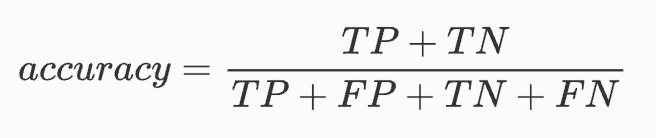

In [3]:
from IPython.display import Image
Image('5_accuracy.png')

A continuación se presenta una matriz de confusión que representa los parámetros anteriores:

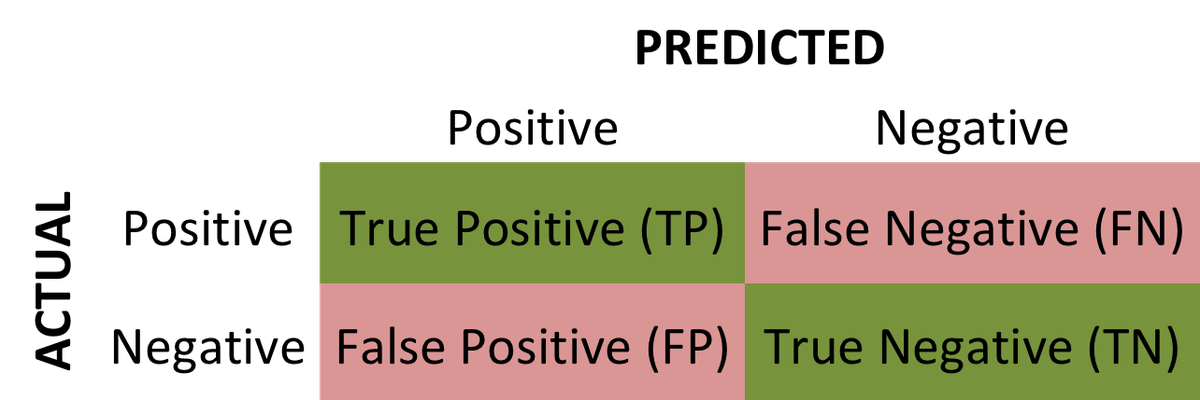

In [4]:
from IPython.display import Image
Image('5_Confusion_Matrix.png')

Muchos métodos utilizan la clasificación binaria. Usaremos la regresión logística multivariante para el presente estudio.

## Paso 1: Importar librerías y datos

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_excel('1_Descr_normal.xlsx', sheet_name='Transformados continuas', index_col=0).drop(['wcount', 'category', 'X_apellido_demandado', 'X_apellido_otro', 'X_nombre_actor', 'X_nombre_autorizado', 'X_nombre_demandado', 'X_nombre_otro'], axis=1)

for ind in dataset.index:
    if dataset['Y_type'][ind] == 'Contestación de demanda':
        dataset['Y_type'][ind] = '1'

    elif dataset['Y_type'][ind] == 'Manifestación de parte':
        dataset['Y_type'][ind] = '0'
        
dataset.drop(dataset[dataset['Y_type'] == 'Solicitud de copias certificadas'].index, inplace = True)
dataset.drop(dataset[dataset['Y_type'] == 'Consignación billete de deposito'].index, inplace = True)
dataset = dataset.reset_index(drop=True)

In [43]:
dataset['Y_type'].value_counts()

1    21
0    14
Name: Y_type, dtype: int64

Así que tenemos 21 documentos Contestación de demanda, denotados como 1, y 14 documentos Manifestación de parte, denotados como 0.

### a. Definir las variables independientes y la variable dependiente

Almacenaremos las filas de los conceptos de anonimización en una variable X y la clase correspondiente de esas observaciones (0 o 1) en una variable Y.

In [45]:
X = dataset.drop('Y_type' ,axis=1)
y = dataset['Y_type']

### b. Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba

Utilizamos el 75% de los datos para el entrenamiento y el 25% para las pruebas.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

### c. Normalizar los datos para la estabilidad numérica

Normalizamos después de dividir los datos.

In [47]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

### d. Ajustar un modelo de regresión logística a los datos de entrenamiento

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### e. Hacer predicciones con el conjunto de prueba

In [54]:
predictions = model.predict(X_test)

### f. Calcular la precisión comparando los valores reales y los valores previstos

Ahora podemos calcular el rendimiento del modelo comparando las predicciones del modelo con los verdaderos valores objetivo, que reservamos en la variable y_test.

En primer lugar, calcularemos la matriz de confusión para obtener los parámetros necesarios:

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive (TP)  = ', TP)
print('False Positive (FP) = ', FP)
print('True Negative (TN)  = ', TN)
print('False Negative (FN) = ', FN)

True Positive (TP)  =  5
False Positive (FP) =  1
True Negative (TN)  =  3
False Negative (FN) =  0


Con estos valores, ahora podemos calcular la precisión:

In [58]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Precisión del clasificador binario = {:0.3f}'.format(accuracy))

Precisión del clasificador binario = 0.889
